<a href="https://colab.research.google.com/github/KimYongHwi/machine-learning-study/blob/main/natural_language_processing/10_keras_Word2Vec_%EA%B5%AC%ED%98%84.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.datasets import fetch_20newsgroups

dataset = fetch_20newsgroups(shuffle=True, random_state=2, remove=('headers', 'footer', 'quotes'))

documents = dataset.data

print(len(documents))
print(documents[0:10])

11314
["Something about how Koresh had threatened to cause local \nproblems with all these wepaons he had and was alleged to\nhave.  \n\nSomeone else will post more details soon, I'm sure.\n\nOther News:\nSniper injures 9 outside MCA buildling in L.A.  Man arrested--suspect\nwas disgruntled employee of Universal Studios, which\nis a division of M.C.A.\n\n\nQUESTION:\nWhat will Californians do with all those guns after the Reginald\ndenny trial?\n\n-Case Kim\nkim39@husc.harvard.edu\n\n", "\nI have an Okidata 2410 printer for which I would like to have a printer driver.\nHas anyone seen such a thing?  There is not one on the Microsoft BBS.\nI can print to it from Windows but I have no fonts available and with\nParadox for Windows I can't print labels on it unless there is a proper printer\ndefined.\n\n\nThanks,\n\nBryan K. Ward\nSurvey Research Center\nUniversity of Utah\n\ni-mail: bryan@src.sbs.utah.edu\n\n", "\nI just put replaced the motherboard in a system and had similar questions.\

In [2]:
import re
import nltk

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('stopwords')
nltk.download('punkt')

def clean_text(d):
    pattern = r'[^a-zA-Z\s]'
    text = re.sub(pattern, '', d)
    return text

def clean_stopword(d):
    stop_words = stopwords.words('english')
    return ' '.join([w.lower() for w in d.split() if w not in stop_words and len(w) > 3])

def tokenize(d):
    return word_tokenize(d)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [3]:
import pandas as pd

news_df = pd.DataFrame({'article': documents})
news_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11314 entries, 0 to 11313
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   article  11314 non-null  object
dtypes: object(1)
memory usage: 88.5+ KB


In [4]:
news_df.replace("", float("NaN"), inplace=True)
news_df.dropna(inplace=True)
news_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11307 entries, 0 to 11313
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   article  11307 non-null  object
dtypes: object(1)
memory usage: 176.7+ KB


In [5]:
news_df['article'] = news_df['article'].apply(clean_text)
news_df['article'] = news_df['article'].apply(clean_stopword)
tokenized_news = news_df['article'].apply(tokenize)
tokenized_news = tokenized_news.to_list()

In [6]:
import numpy as np

drop_news = [index for index, sentence in enumerate(tokenized_news) if len(sentence) <=1]
news_texts = np.delete(tokenized_news, drop_news, axis=0)
print(news_texts)
print(len(news_texts))

[list(['something', 'koresh', 'threatened', 'cause', 'local', 'problems', 'wepaons', 'alleged', 'someone', 'else', 'post', 'details', 'soon', 'sure', 'other', 'news', 'sniper', 'injures', 'outside', 'buildling', 'arrestedsuspect', 'disgruntled', 'employee', 'universal', 'studios', 'division', 'question', 'what', 'californians', 'guns', 'reginald', 'denny', 'trial', 'case', 'kimhuscharvardedu'])
 list(['okidata', 'printer', 'would', 'like', 'printer', 'driver', 'anyone', 'seen', 'thing', 'there', 'microsoft', 'print', 'windows', 'fonts', 'available', 'paradox', 'windows', 'cant', 'print', 'labels', 'unless', 'proper', 'printer', 'defined', 'thanks', 'bryan', 'ward', 'survey', 'research', 'center', 'university', 'utah', 'imail', 'bryansrcsbsutahedu'])
 list(['replaced', 'motherboard', 'system', 'similar', 'questions', 'cents', 'worth', 'speaker', 'connector', 'wires', 'going', 'speaker', 'speaker', 'coil', 'bidirectional', 'makes', 'difference', 'attach', 'turbo', 'switch', 'there', 'thr

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


In [7]:
from tensorflow.keras.preprocessing.text import Tokenizer

news_2000 = news_texts[:2000]

tokenizer = Tokenizer()
tokenizer.fit_on_texts(news_2000)

print(tokenizer.word_index.items())

idx2word = { value:key for key, value in tokenizer.word_index.items()}
sequences = tokenizer.texts_to_sequences(news_2000)

dict_items([('would', 1), ('dont', 2), ('know', 3), ('like', 4), ('people', 5), ('think', 6), ('also', 7), ('maxaxaxaxaxaxaxaxaxaxaxaxaxaxax', 8), ('this', 9), ('well', 10), ('could', 11), ('time', 12), ('good', 13), ('even', 14), ('first', 15), ('much', 16), ('said', 17), ('many', 18), ('work', 19), ('right', 20), ('make', 21), ('going', 22), ('anyone', 23), ('something', 24), ('they', 25), ('system', 26), ('need', 27), ('used', 28), ('please', 29), ('believe', 30), ('last', 31), ('want', 32), ('stephanopoulos', 33), ('information', 34), ('year', 35), ('what', 36), ('still', 37), ('back', 38), ('find', 39), ('since', 40), ('data', 41), ('years', 42), ('there', 43), ('email', 44), ('drive', 45), ('problem', 46), ('really', 47), ('thanks', 48), ('never', 49), ('point', 50), ('using', 51), ('made', 52), ('thats', 53), ('things', 54), ('university', 55), ('number', 56), ('cant', 57), ('might', 58), ('another', 59), ('sure', 60), ('take', 61), ('must', 62), ('read', 63), ('without', 64), (

In [8]:
vocab_size = len(tokenizer.word_index) + 1
print(vocab_size)

29667


In [9]:
sequences[1]

[12789,
 1446,
 1,
 4,
 1446,
 401,
 23,
 166,
 78,
 43,
 1246,
 834,
 71,
 1326,
 73,
 8977,
 71,
 57,
 834,
 5777,
 333,
 1078,
 1446,
 1447,
 48,
 5778,
 4323,
 1383,
 93,
 101,
 55,
 2206,
 12790,
 12791]

### Skipgram 전처리
- 네거티브 샘플링(Negative Sampling)
  - Word2Vec은 출력층이 내놓은 값에 softmax 함수를 적용해 확률값으로 변환한 후 이를 정답과 비교해 역전파
  - softmax를 적용하려면 분모에 해당하는 값, 즉 중심단어와 나머지 모든 단어의 내적(행렬곱)을 한 뒤, 이를 다시 exp계산을 하는데 전체 단어가 많을 경우 엄청난 계산량이 발생한다.
  - 네거티브 샘플링은 softmax 확률을 구할 때 전체 단어를 대상으로 구하지 않고, 일부 단어만 뽑아서 계산하는 방식이다.
  - 네거티브 샘플링 동작은 사용자가 지정한 윈도우 사이즈 내에 등장하지 않는 단어(negative samples)를 5~20개 정보 뽑고, 이를 정답단어와 합쳐 전체 단어처럼 softmax 확률을 계산하여 파라미터를 업데이트 한다.

In [10]:
from tensorflow.keras.preprocessing.sequence import skipgrams

skip_grams = [skipgrams(sample, vocabulary_size=vocab_size, window_size=10) for sample in sequences[:10]]

In [11]:
pairs, labels = skip_grams[0][0], skip_grams[0][1]

for i in range(5):
    print("{:s}({:d}), {:s}({:d}) -> {:d}".format(
        idx2word[pairs[i][0]], pairs[i][0],
        idx2word[pairs[i][1]], pairs[i][1],
        labels[i]
    ))

local(240), vested(8995) -> 0
post(159), details(429) -> 1
sure(60), cloverleaf(18828) -> 0
post(159), cause(396) -> 1
else(195), problems(203) -> 1


In [12]:
print(len(skip_grams))
print(len(pairs))
print(len(labels))

10
1180
1180


In [13]:
skip_grams = [skipgrams(seq, vocabulary_size=vocab_size, window_size=10) for seq in sequences]

In [14]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Embedding, Reshape, Activation, Input, Dot
from tensorflow.keras.utils import plot_model

In [15]:
embed_size=50

In [16]:
def word2vec():
    target_inputs = Input(shape=(1,), dtype='int32')
    target_embedding = Embedding(vocab_size, embed_size)(target_inputs)

    context_inputs = Input(shape=(1,), dtype='int32')
    context_embedding = Embedding(vocab_size, embed_size)(context_inputs)

    dot_product = Dot(axes=2)([target_embedding, context_embedding])
    dot_product = Reshape((1, ), input_shape=(1, 1))(dot_product)

    output = Activation('sigmoid')(dot_product)

    model = Model(inputs=[target_inputs, context_inputs], outputs=output)
    model.compile(loss='binary_crossentropy', optimizer='adam')

    return model

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 1)]          0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 1)]          0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 1, 50)        1483350     input_1[0][0]                    
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, 1, 50)        1483350     input_2[0][0]                    
______________________________________________________________________________________________

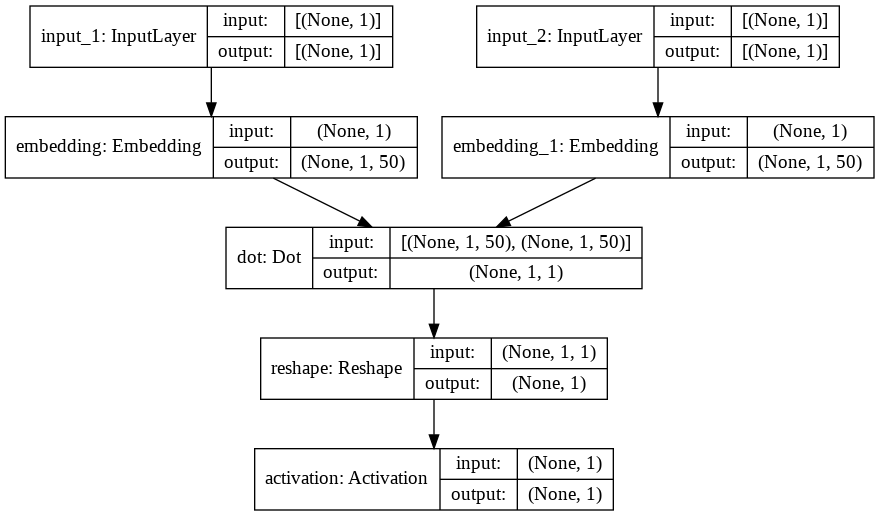

In [17]:
model = word2vec()
model.summary()

plot_model(model, show_shapes=True, show_layer_names=True)

In [18]:
for epoch in range(1, 11):
    loss = 0
    for _, elem in enumerate(skip_grams):
        first_elem = np.array(list(zip(*elem[0]))[0], dtype='int32')
        second_elem = np.array(list(zip(*elem[0]))[1], dtype='int32')
        labels = np.array(elem[1], dtype='int32')
        X = [first_elem, second_elem]
        Y = labels
        loss += model.train_on_batch(X, Y)

    print('Epoch: ', epoch, ' Loss: ', loss)

Epoch:  1  Loss:  1233.8202458322048
Epoch:  2  Loss:  948.9591451585293
Epoch:  3  Loss:  859.5329931080341
Epoch:  4  Loss:  818.8998345285654
Epoch:  5  Loss:  795.0799922719598
Epoch:  6  Loss:  775.6442175656557
Epoch:  7  Loss:  754.5285155251622
Epoch:  8  Loss:  728.534493226558
Epoch:  9  Loss:  696.4961577430367
Epoch:  10  Loss:  658.8379902951419


In [19]:
import gensim

f = open('skipgram.txt', 'w')
f.write('{} {}\n'.format(vocab_size-1, embed_size))

vectors = model.get_weights()[0]
for word, i in tokenizer.word_index.items():
    f.write('{} {}\n'.format(word, ' '.join(map(str, list(vectors[i, :])))))
f.close()

skipgram = gensim.models.KeyedVectors.load_word2vec_format('skipgram.txt', binary=False)

In [20]:
skipgram.most_similar(positive=['soldier'])

[('encompasses', 0.8054168820381165),
 ('destruction', 0.7958745956420898),
 ('understandable', 0.7886909246444702),
 ('vagueness', 0.7871052026748657),
 ('sickening', 0.7847049236297607),
 ('joint', 0.7845845222473145),
 ('behalf', 0.7831438183784485),
 ('platypus', 0.7829664349555969),
 ('writers', 0.7810239791870117),
 ('bodies', 0.7806593179702759)]

In [21]:
skipgram.most_similar(positive=['world'])

[('virago', 0.6926425099372864),
 ('scripture', 0.6683127284049988),
 ('woodward', 0.6607397198677063),
 ('deanfringeraincom', 0.6286775469779968),
 ('sociopsychotic', 0.6142101883888245),
 ('fhhinsley', 0.6080105900764465),
 ('gunsnroses', 0.6068019866943359),
 ('sunset', 0.5828039050102234),
 ('church', 0.5827620029449463),
 ('dioscurus', 0.5738413333892822)]

### CBOW

In [22]:
def skipgram2cbow(skipgrams):
    cbows = []
    flag = 0
    for n in skipgrams:
        temp1 = []
        for t in n:
            if flag == 1:
                flag = 0
                temp1.append(t)
            else:
                flag = 1
                temp2 = []
                for x in t:
                    temp2.append([x[1], x[0]])
                temp1.append(temp2)
        cbows.append(temp1)

    return cbows

In [23]:
cbows = skipgram2cbow(skip_grams)

In [24]:
pairs, labels = cbows[0][0], cbows[0][1]

for i in range(5):
    print("{:s}({:d}), {:s}({:d}) -> {:d}".format(
        idx2word[pairs[i][0]], pairs[i][0],
        idx2word[pairs[i][1]], pairs[i][1],
        labels[i]
    ))

newsgroupssoccultureturkishtalkpoliticsmideasttalkpolitics(18482), other(851) -> 0
problems(203), news(259) -> 1
coworker(23685), local(240) -> 0
cause(396), soon(484) -> 1
flaming(3014), case(92) -> 0


In [25]:
print(len(cbows))
print(len(pairs))
print(len(labels))

2000
1180
1180


Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 1)]          0                                            
__________________________________________________________________________________________________
input_4 (InputLayer)            [(None, 1)]          0                                            
__________________________________________________________________________________________________
embedding_2 (Embedding)         (None, 1, 50)        1483350     input_3[0][0]                    
__________________________________________________________________________________________________
embedding_3 (Embedding)         (None, 1, 50)        1483350     input_4[0][0]                    
____________________________________________________________________________________________

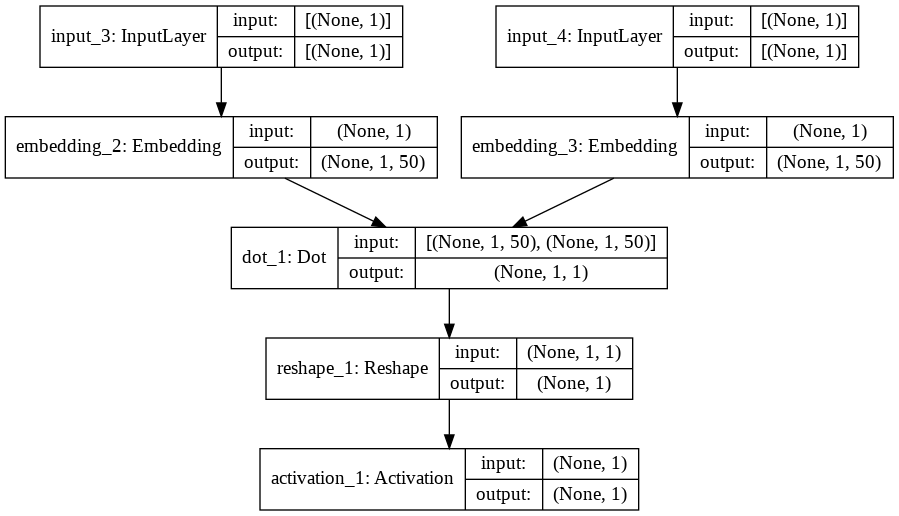

In [26]:
model = word2vec()
model.summary()

plot_model(model, show_shapes=True, show_layer_names=True)

In [27]:
for epoch in range(1, 10):
    loss = 0
    for _, elem in enumerate(cbows):
        first_elem = np.array(list(zip(*elem[0]))[0], dtype='int32')
        second_elem = np.array(list(zip(*elem[0]))[1], dtype='int32')
        labels = np.array(elem[1], dtype='int32')
        X = [first_elem, second_elem]
        Y = labels
        loss += model.train_on_batch(X, Y)

    print('Epoch: ', epoch, ' Loss: ', loss)

Epoch:  1  Loss:  1231.5922375023365
Epoch:  2  Loss:  948.3585833907127
Epoch:  3  Loss:  859.9942370504141
Epoch:  4  Loss:  820.455418586731
Epoch:  5  Loss:  798.2273555919528
Epoch:  6  Loss:  780.753919698298
Epoch:  7  Loss:  761.4111013561487
Epoch:  8  Loss:  736.4573406204581
Epoch:  9  Loss:  704.5810805596411


In [28]:
f = open('cbow.txt', 'w')
f.write('{} {}\n'.format(vocab_size-1, embed_size))

vectors = model.get_weights()[0]
for word, i in tokenizer.word_index.items():
    f.write('{} {}\n'.format(word, ' '.join(map(str, list(vectors[i, :])))))
f.close()

cbow = gensim.models.KeyedVectors.load_word2vec_format('cbow.txt', binary=False)

In [29]:
cbow.most_similar(positive=['soldier'])

[('aeon', 0.9787724614143372),
 ('prohibitory', 0.9785358309745789),
 ('mcdsjhihiffakpqpdmzbbyxxcnyyni', 0.9750946760177612),
 ('nonchildbearing', 0.9745528697967529),
 ('preexisted', 0.9744492769241333),
 ('fervor', 0.9741019606590271),
 ('altclipper', 0.9736658334732056),
 ('mlwcwptgvuayssdfndxexfwvld', 0.973621129989624),
 ('wrongdoing', 0.9733453989028931),
 ('summus', 0.9729974269866943)]

In [29]:
cbow.most_similar(positive=['world'])